In [1]:
import pandas as pd
df=pd.read_csv('data.csv',sep=";")
df

,pd,pm,pa,resultat
0,6.8390,6.9600,6.85000,1
1,6.3200,6.4250,5.50000,0
2,6.6850,6.4662,5.49900,0
3,6.8660,6.5000,6.96300,1
4,6.7650,6.5852,5.12300,0
...,...,...,...,...
139,6.4770,6.6230,8.22680,1
140,6.8560,6.7552,8.78569,1
141,6.4580,6.5211,6.22700,0
142,6.5629,6.6260,6.32000,0


In [2]:
df.shape

(144, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pd        144 non-null    float64
 1   pm        144 non-null    float64
 2   pa        144 non-null    float64
 3   resultat  144 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.6 KB


In [4]:
df.describe()

,pd,pm,pa,resultat
count,144.00000,144.000000,144.000000,144.000000
mean,6.61868,6.610351,6.711068,0.506944
std,0.58661,0.331625,0.707967,0.501697
min,5.99920,5.497000,5.123000,0.000000
25%,6.12225,6.519000,6.224150,0.000000
50%,6.52215,6.565500,6.753200,1.000000
75%,6.78640,6.608250,6.963000,1.000000
max,8.78020,8.550000,8.965000,1.000000


In [28]:
df[df.columns[:-1]].values

array([[6.839  , 6.96   , 6.85   ],
       [6.32   , 6.425  , 5.5    ],
       [6.685  , 6.4662 , 5.499  ],
       [6.866  , 6.5    , 6.963  ],
       [6.765  , 6.5852 , 5.123  ],
       [5.9992 , 6.223  , 6.963  ],
       [6.123  , 6.523  , 6.9112 ],
       [6.9994 , 6.491  , 7.2136 ],
       [6.9995 , 6.492  , 5.2137 ],
       [6.9996 , 6.493  , 7.2898 ],
       [6.9997 , 6.494  , 5.2139 ],
       [6.9998 , 6.495  , 6.214  ],
       [6.9999 , 6.36   , 6.5666 ],
       [6.1    , 5.497  , 5.2125 ],
       [6.561  , 6.498  , 7.2143 ],
       [6.745  , 6.499  , 6.9996 ],
       [6.123  , 6.23   , 6.9663 ],
       [6.741  , 6.501  , 6.21746],
       [6.752  , 6.502  , 6.7777 ],
       [6.23   , 6.503  , 6.96633],
       [6.7557 , 6.504  , 6.5006 ],
       [6.858  , 6.505  , 6.78965],
       [6.10009, 6.506  , 7.5335 ],
       [6.1001 , 6.507  , 6.788  ],
       [6.10011, 6.508  , 6.2153 ],
       [6.5475 , 6.509  , 7.2154 ],
       [6.15013, 6.51   , 6.9632 ],
       [6.2    , 6.511  , 7.

In [30]:
import  pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
x=df[df.columns[:-1]].values
y=df[df.columns[-1]].values
y=y.flatten()

In [35]:
from sklearn import model_selection 
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.3)

In [36]:
from sklearn import preprocessing 
std_scale=preprocessing.StandardScaler().fit(x_train)
x_train_std=std_scale.transform(x_train)
x_test_std=std_scale.transform(x_test)

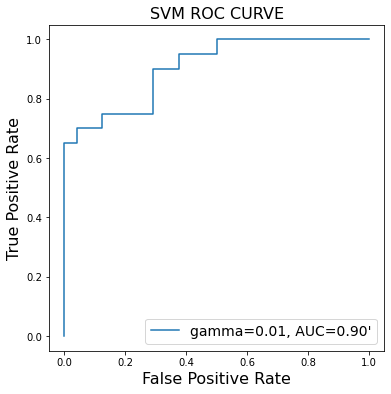

In [39]:
from sklearn import svm
classifier = svm.SVC(kernel="rbf",gamma=0.01)
classifier.fit(x_train_std,y_train)
y_test_pred=classifier.decision_function(x_test_std)
from sklearn import metrics
fpr,tpr,thr=metrics.roc_curve(y_test,y_test_pred)
auc=metrics.auc(fpr,tpr)
from matplotlib import pyplot as plt 
fig=plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,'-',label="gamma=0.01, AUC=%.2f'" %auc)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title('SVM ROC CURVE',fontsize=16)
plt.legend(loc="lower right",fontsize=14)
plt.show()


In [42]:
c_range=np.logspace(-2,3,6)
gamma_range=np.logspace(-2,1,4)
param_grid={"C":c_range,"gamma":gamma_range}
score="roc_auc"
grid=model_selection.GridSearchCV(svm.SVC(kernel="rbf"),param_grid,cv=5,scoring=score)
grid.fit(x_train_std,y_train)
print('la valeur optimale est %s avec un score de %.2f' % \
     (grid.best_params_,grid.best_score_))

la valeur optimale est {'C': 1.0, 'gamma': 0.1} avec un score de 0.84


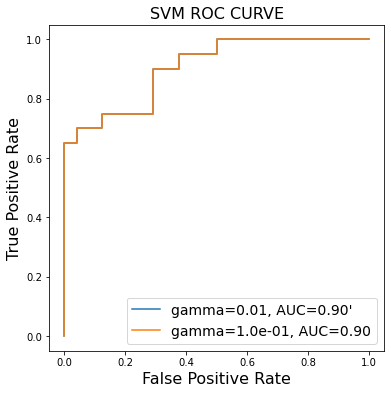

In [52]:
y_test_pred_cv=classifier.decision_function(x_test_std)
fpr_cv,tpr_cv,thr_cv=metrics.roc_curve(y_test,y_test_pred_cv)
auc_cv=metrics.auc(fpr_cv,tpr_cv)
fig=plt.figure(figsize=(6,6))
# courbe roc
plt.plot(fpr,tpr,'-',label="gamma=0.01, AUC=%.2f'" % auc)

plt.plot(fpr_cv,tpr_cv,'-',label="gamma=%.1e, AUC=%.2f" % \
        (grid.best_params_['gamma'],auc_cv))

plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title('SVM ROC CURVE',fontsize=16)
plt.legend(loc="lower right",fontsize=14)
plt.show()


In [62]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf',C=1.0,gamma=0.1)
clf.fit(x,y)
print(clf.predict([[4.39,4.05,3.05]]))

[0]
